In [15]:
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

In [16]:
df_paralelo = pd.read_csv('Codigos/resultados_paralelo.csv', encoding='utf-8-sig')
df_sequencia = pd.read_csv('Codigos/resultado_sequêncial.csv', encoding='utf-8-sig')
df_openmp = pd.read_csv('Codigos/resultado_OpenMP.csv', encoding='utf-8-sig')

In [17]:
print(df_sequencia)

   Tamanho da matriz   Tempo (milisegundos)
0                 10                      0
1                 20                      0
2                 40                      0
3                 80                      2
4                160                     14
5                320                    106
6                640                    940
7               1280                   7860


In [18]:
print(df_paralelo)

   Tamanho da matriz   Tempo (milisegundos)
0                 10                      0
1                 20                      0
2                 40                      0
3                 80                      1
4                160                      4
5                320                     31
6                640                    267
7               1280                   2872


In [19]:
print(df_openmp)

   Tamanho da matriz   Tempo (milisegundos)
0                 10                      0
1                 20                      0
2                 40                      0
3                 80                      0
4                160                      4
5                320                     36
6                640                    271
7               1280                   2959


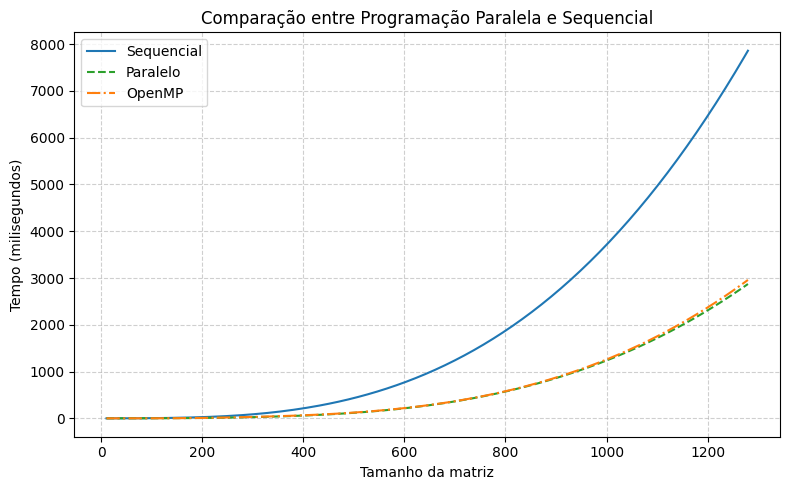

In [20]:
x1 = df_sequencia['Tamanho da matriz']
y1 = df_sequencia[' Tempo (milisegundos)']

x2 = df_paralelo['Tamanho da matriz']
y2 = df_paralelo[' Tempo (milisegundos)']

x3 = df_openmp['Tamanho da matriz']
y3 = df_openmp[' Tempo (milisegundos)']

x_new = np.linspace(min(x1.min(), x2.min(), x3.min()), max(x1.max(), x2.max(), x3.max()), 200)
y1_smooth = make_interp_spline(x1, y1)(x_new)
y2_smooth = make_interp_spline(x2, y2)(x_new)
y3_smooth = make_interp_spline(x3, y3)(x_new)

plt.figure(figsize=(8,5))
plt.plot(x_new, y1_smooth, label='Sequencial', color='tab:blue')
plt.plot(x_new, y2_smooth, label='Paralelo', color='tab:green', linestyle='--')
plt.plot(x_new, y3_smooth, label='OpenMP', color='tab:orange', linestyle='-.')

plt.title('Comparação entre Programação Paralela e Sequencial')
plt.xlabel('Tamanho da matriz')
plt.ylabel('Tempo (milisegundos)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
